# Algoritma Naive Bayes Untuk Menghitung Harga Sewa Rumah Perbulan
oleh : Rifqi Charisma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#memasukan data latih
df = pd.read_csv('house_data.csv')
df.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# drop kolom yang tidak diperlukan
data = df.drop(columns=['id', 'date', 'sqft_living', 'sqft_lot','waterfront', 'sqft_above', 'sqft_basement', 'yr_built',
                        'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'floors', 'view'])
data

,price,bedrooms,bathrooms,condition,grade
0,221900.0,3,1.00,3,7
1,538000.0,3,2.25,3,7
2,180000.0,2,1.00,3,6
3,604000.0,4,3.00,5,7
4,510000.0,3,2.00,3,8
...,...,...,...,...,...
21608,360000.0,3,2.50,3,8
21609,400000.0,4,2.50,3,8
21610,402101.0,2,0.75,3,7
21611,400000.0,3,2.50,3,8


In [6]:
print(data.keys()) # melihat atribut di dalam dataset

Index(['price', 'bedrooms', 'bathrooms', 'condition', 'grade'], dtype='object')


In [18]:
# pisahkan atribut dan label
predictions = ['bedrooms', 'bathrooms', 'condition','grade']

X = data[predictions]
y = data['price']

print(X)
print(y)

       bedrooms  bathrooms  condition  grade
0             3       1.00          3      7
1             3       2.25          3      7
2             2       1.00          3      6
3             4       3.00          5      7
4             3       2.00          3      8
...         ...        ...        ...    ...
21608         3       2.50          3      8
21609         4       2.50          3      8
21610         2       0.75          3      7
21611         3       2.50          3      8
21612         2       0.75          3      7

[21613 rows x 4 columns]
0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [27]:
# lakukan normalisasi terhadap data yang kita miliki

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()

,bedrooms,bathrooms,condition,grade
0,-0.398737,-1.447464,-0.629187,-0.558836
1,-0.398737,0.175607,-0.629187,-0.558836
2,-1.473959,-1.447464,-0.629187,-1.409587
3,0.676485,1.149449,2.444294,-0.558836
4,-0.398737,-0.149007,-0.629187,0.291916


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#we have assigned random_state as 0 so that each time when we run this ,we get the same output

In [20]:
X_train.shape # jumlah data training

(16209, 4)

In [21]:
X_test.shape # jumlah data testing

(5404, 4)

In [29]:
# memanggil model naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [39]:
from sklearn.linear_model import LinearRegression

# latih model dengan linear Regression.fit()
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

ValueError: x and y must be the same size

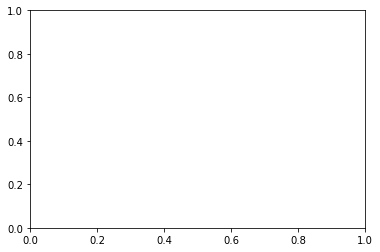

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
# menampilkan plot hubungan antara jumlah kamar dengan harga rumah
plt.scatter(X_train, y_train)
plt.plot(X_train, linreg.predict(X_train), color='red')
plt.show()

In [24]:
# input atribut untuk prediksi
Bedrooms=eval(input("Enter the bedrooms- "))
Bathrooms=eval(input("Enter the bathrooms- "))
#Floors=eval(input("Enter the floors- "))
#View=eval(input("Enter the view- "))
Condition=eval(input("Enter the condition- "))
Grade=eval(input("Enter the grade- "))
X_new = np.array([[Bedrooms,Bathrooms,Condition,Grade]])

Enter the bedrooms- 3
Enter the bathrooms- 1.00
Enter the condition- 3
Enter the grade- 7


In [25]:
#calling predict method from knn for making prediction
prediction = model.predict(X_new)
print("Predicted target price ",prediction)

Predicted target price  [147000.]


In [15]:
y_pred = model.predict(X_test)
print("Test set prediction:\n {}".format(y_pred))

Test set prediction:
 [139500. 831000. 174500. ... 208800. 149000. 182700.]


In [40]:
#accuracy
from sklearn.preprocessing import StandardScaler
model.score(X_test,y_test)

AttributeError: 'list' object has no attribute 'shape'